In [273]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd 
# Read data 
df = pd.read_csv('ign_cleaned.csv')
#dropping the unneeded values
df.drop(['Unnamed: 0', 'url'], axis=1, inplace=True)

df.columns.values

array(['score_phrase', 'title', 'platform', 'score', 'genre',
       'editors_choice', 'release_year', 'release_month', 'release_day'],
      dtype=object)

In [274]:
# Check the games released on week days
import datetime

def convert_to_week_day(date_time_str):
    date_time_obj = datetime.datetime.strptime(date_time_str, '%Y-%m-%d')
    return date_time_obj.weekday() # Monday is 0 and Sunday is 6

def create_date_time_str(row):
    seperator = '-'
    return seperator.join([str(int(row['release_year'])), str(int(row['release_month'])), str(int(row['release_day'])) ])

def convert_to_day_type(num):
    if (num >= 0 and num <= 4):
        return 'Weekday'
    else:
        return 'Weekend'
    
day_type = []
for index, row in df.iterrows():
    if (str(row['release_year']).isdigit() and str(row['release_month']).isdigit() and str(row['release_day']).isdigit()):
        day_type.append(convert_to_day_type(convert_to_week_day(create_date_time_str(row))))

df['day_type'] = day_type
print(len(day_type), len(df))


18625 18625


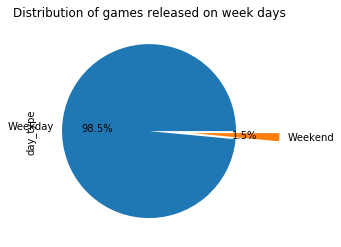

In [275]:
df['day_type'].value_counts()[:2].plot(kind='pie',radius=1, autopct='%1.1f%%',explode=[0,0.5])
plt.title('Distribution of games released on week days')
plt.show()

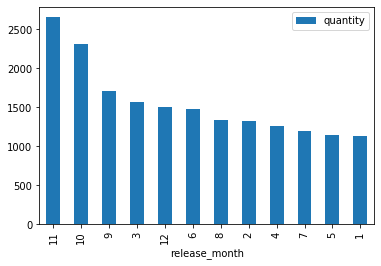

In [285]:
# Check the highest release in months and years

df['release_month'].value_counts().rename_axis('release_month').to_frame('quantity').plot(kind='bar', legend=True)

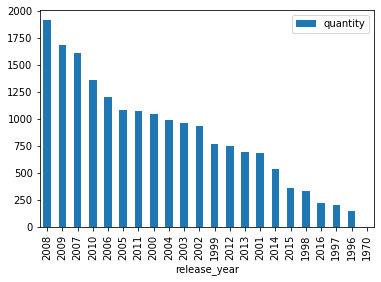

In [286]:
df['release_year'].value_counts().rename_axis('release_year').to_frame('quantity').plot(kind='bar', legend=True)